In this analysis, we focus on predicting diamond prices using various machine learning algorithms. This project utilizes a dataset of diamonds that includes features such as carat, color, clarity, depth, and table, with the goal of estimating their prices. We employ different predictive methods and compare their effectiveness to identify which algorithm provides the most accurate predictions.

The process involves constructing and training machine learning pipelines that combine different algorithms with data normalization techniques. We then evaluate the performance of these models based on various performance metrics to determine the best approach for predicting diamond prices.

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,15))
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

<Figure size 1500x1500 with 0 Axes>

In [2]:
df = pd.read_csv('diamonds.csv')

Data Exploration

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df.shape

(53940, 11)

In [6]:
df = df.drop('Unnamed: 0',axis=1)

In [7]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

carat: Weight(0.2 to 5.01) of the diamond

cut: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: Diamond colour from J(worst) to D(best)

clarity: Measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: Length(0 to 10.74) in mm

y: Width(0 to 58.9) in mm

z: Depth(0 to 31.8) in mm

depth %: The height of a diamond, measured from the culet to the table, divided by its average girdle diameter. Total depth percentage(43 to 79) = z/mean(x,y) = 2*z/(x+y)

table: Width(43 to 95) of the top of diamond relative to widest point

price: Price in US dollar

In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
df.describe(include='object')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [10]:
for column in df.columns:
    print(column,df[column].nunique())

carat 273
cut 5
color 7
clarity 8
depth 184
table 127
price 11602
x 554
y 552
z 375


Categorical values explained: 

There are 5 differents cut degrees

There are 7 different colors

There are 8 clarity degrees 

In [11]:
for col in ['color', 'cut', 'clarity']:
    print(df[col].value_counts())

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


Color

G: 11,292

The color grade G is the most common, appearing 11,292 times.

E: 9,797

The color grade E appears 9,797 times.

F: 9,542

The color grade F is present 9,542 times.

H: 8,304

The color grade H appears 8,304 times.

D: 6,775

The color grade D appears 6,775 times.

I: 5,422

The color grade I appears 5,422 times.

J: 2,808

The color grade J is the least common, appearing 2,808 times.

Cut

Ideal: 21,551

The cut grade Ideal is the most common, with 21,551 diamonds.

Premium: 13,791

The cut grade Premium is the second most common, with 13,791 diamonds.

Very Good: 12,082

The cut grade Very Good is present 12,082 times.

Good: 4,906

The cut grade Good appears 4,906 times.

Fair: 1,610

The cut grade Fair is the least common, with 1,610 diamonds.

Clarity

SI1: 13,065

The clarity grade SI1 is the most common, with 13,065 diamonds.

VS2: 12,258

The clarity grade VS2 is the second most common, with 12,258 diamonds.

SI2: 9,194

The clarity grade SI2 appears 9,194 times.

VS1: 8,171

The clarity grade VS1 appears 8,171 times.

VVS2: 5,066

The clarity grade VVS2 is present 5,066 times.

VVS1: 3,655

The clarity grade VVS1 appears 3,655 times.

IF: 1,790

The clarity grade IF is less common, with 1,790 diamonds.

I1: 741

The clarity grade I1 is the least common, with 741 diamonds.

These comments explain the frequency of each category within the color, cut, and clarity columns, providing insights into the distribution of these categorical features in the diamonds dataset.

In [12]:
categorical_features = [feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['price']))]
categorical_features

['cut', 'color', 'clarity']

In [13]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes !='O') & (feature not in ['price']))]
print('Number of numerical variables:', len(numerical_features))

Number of numerical variables: 6


In [14]:
continuous_features = [feature for feature in df.columns if ((df[feature].dtypes !='O') & (feature not in ['price']))]
print('Number of continuousl variables:', len(continuous_features))

df[continuous_features].head()

Number of continuousl variables: 6


,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [39]:
dict_cut = dict((k,v) for v, k in enumerate (('Fair', 'Good', 'Very Good', 'Premium', 'Ideal')))
dict_color = dict((k,v) for v , k in enumerate('DEFGHIJ'[::-1]))
dict_clarity = dict((k,v) for v , k in enumerate (('I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF')))

In [40]:
df.replace({'cut': dict_cut}, inplace=True)
df.replace({'color': dict_color}, inplace=True)
df.replace({'clarity':dict_clarity}, inplace=True)
df[['cut','color','clarity']] = df[['cut','color','clarity']].astype('category')

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


Distribution of every feature

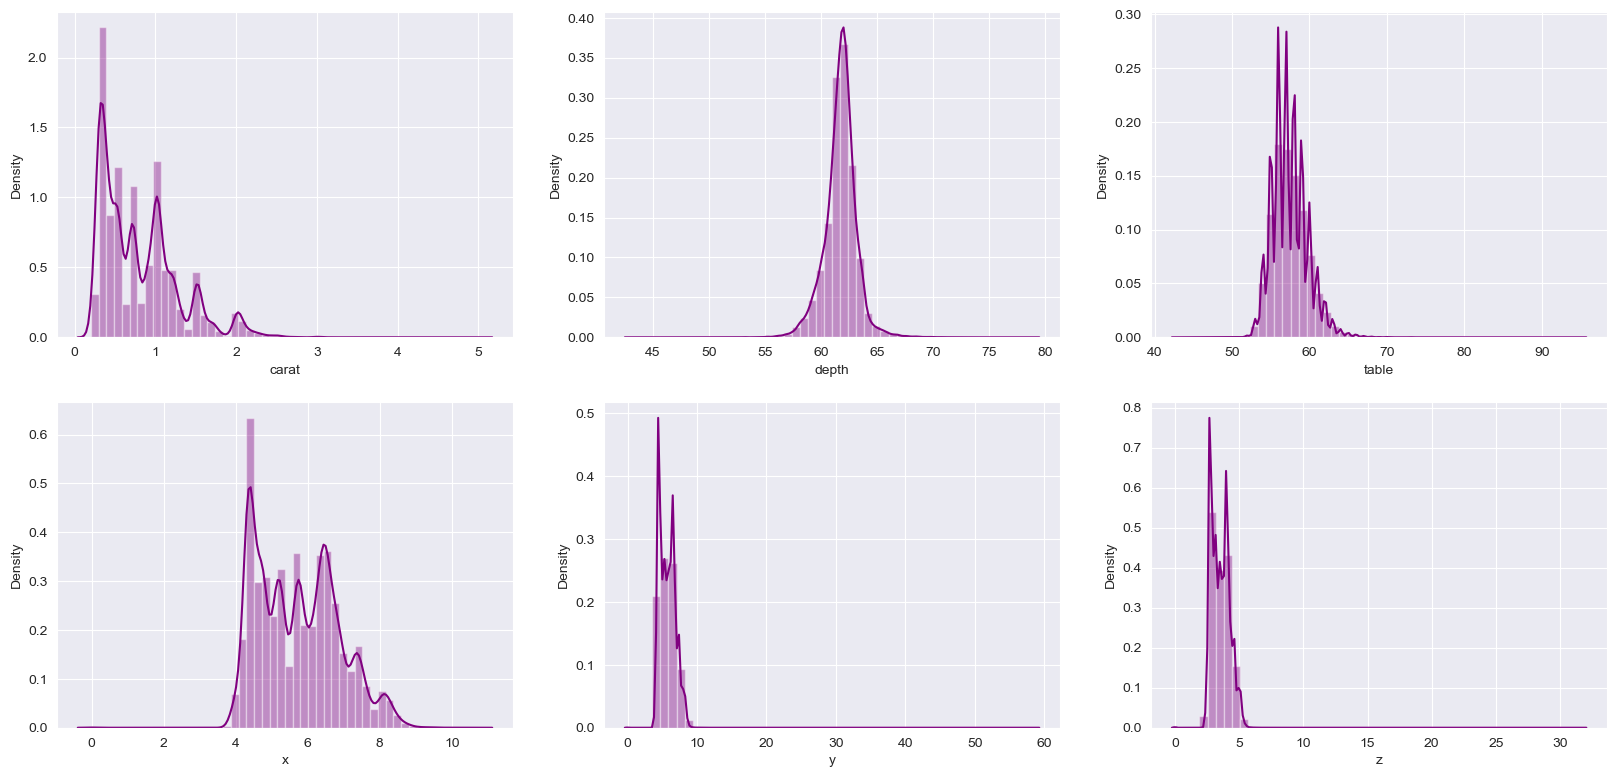

In [41]:
plt.figure(figsize=(20,60), facecolor='white')
pltnumber = 1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,pltnumber)
    sns.distplot(df[continuous_feature], color="purple", kde=True)
    plt.xlabel(continuous_feature)
    pltnumber += 1
plt.show()


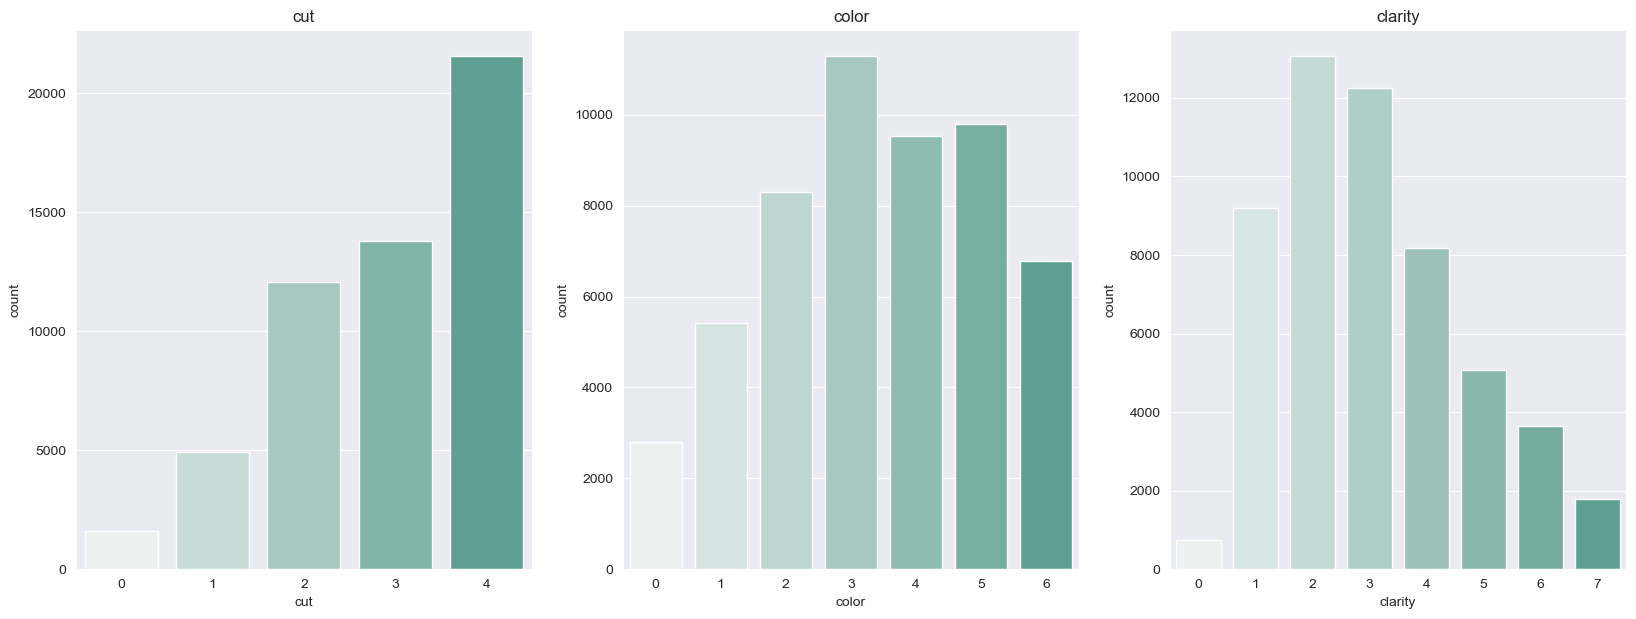

In [42]:
fig , axes = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
idx = 0
for i in ['cut','color','clarity']:
    sns.countplot(data=df, x=i, palette="light:#5A9" , ax= axes[idx]).set_title(i)
    idx +=1
plt.show()

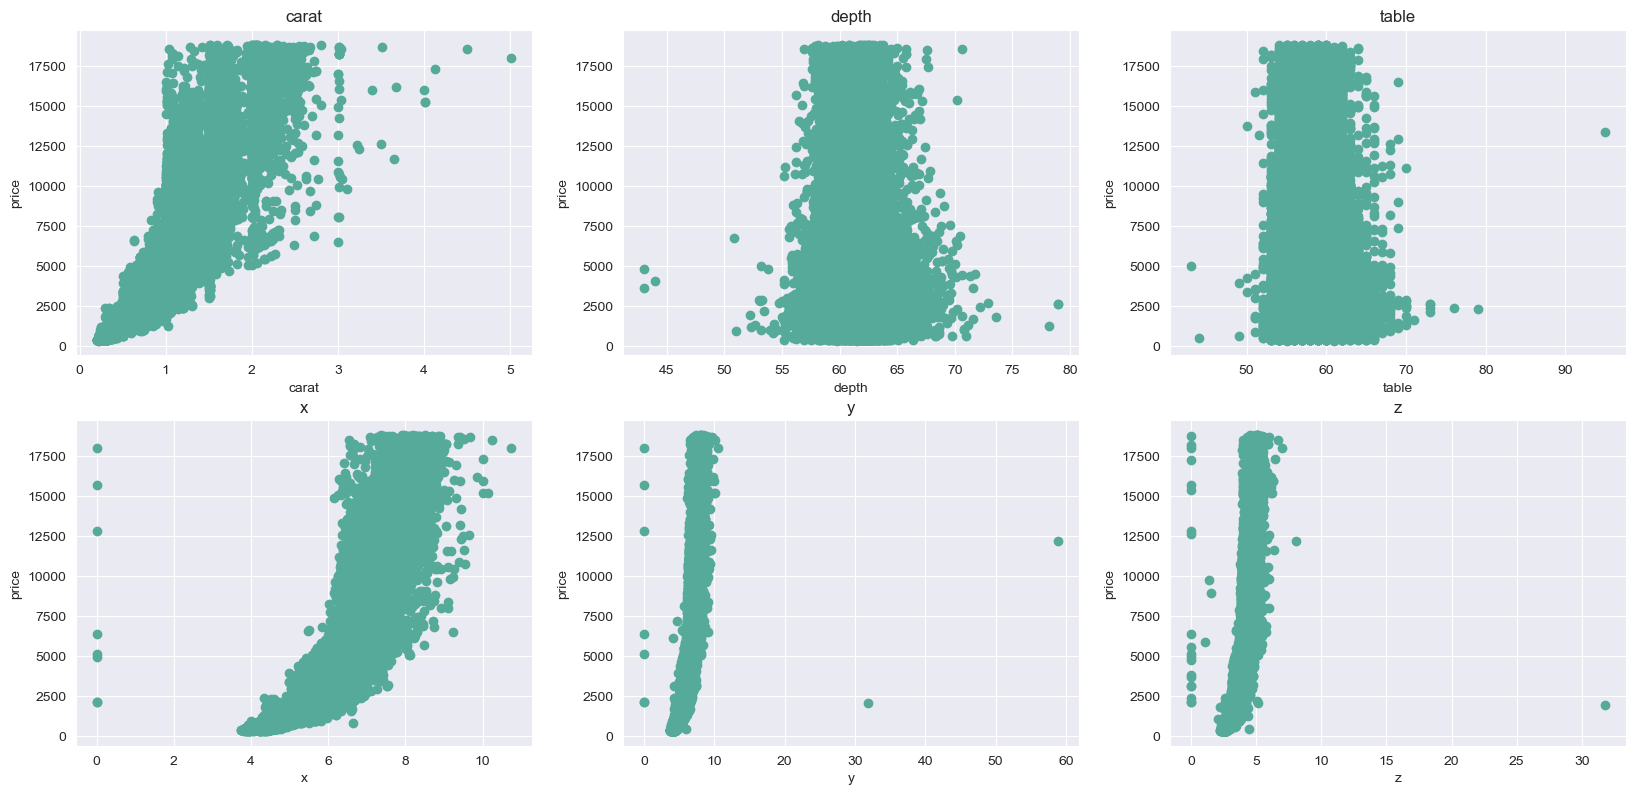

In [43]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for feature in continuous_features:
    data = df.copy()
    ax = plt.subplot(12,3,plotnumber)
    plt.scatter(data[feature],data['price'],color='#5A9')
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plotnumber += 1
plt.show()

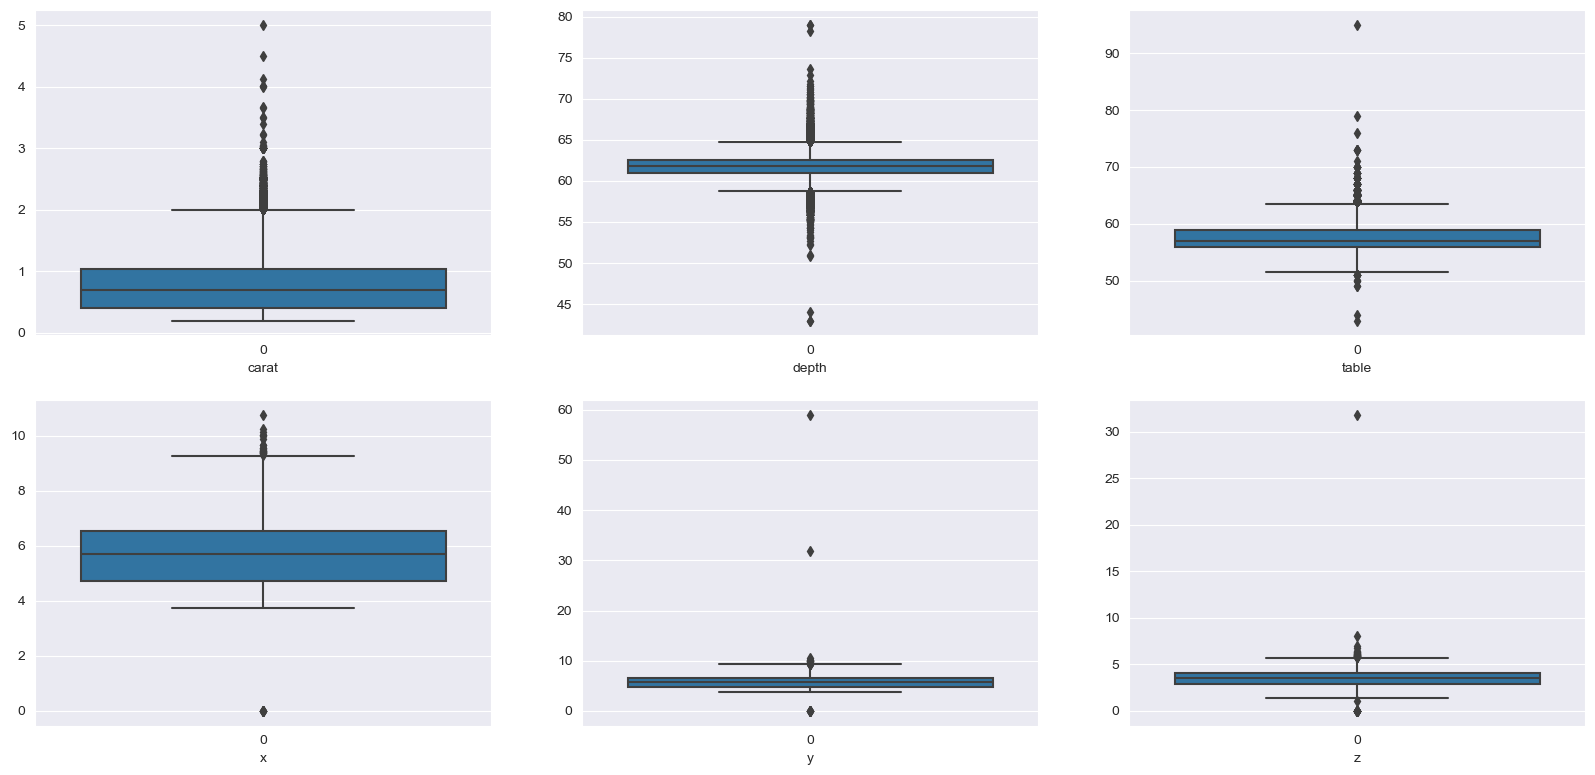

In [44]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber +=1
plt.show()

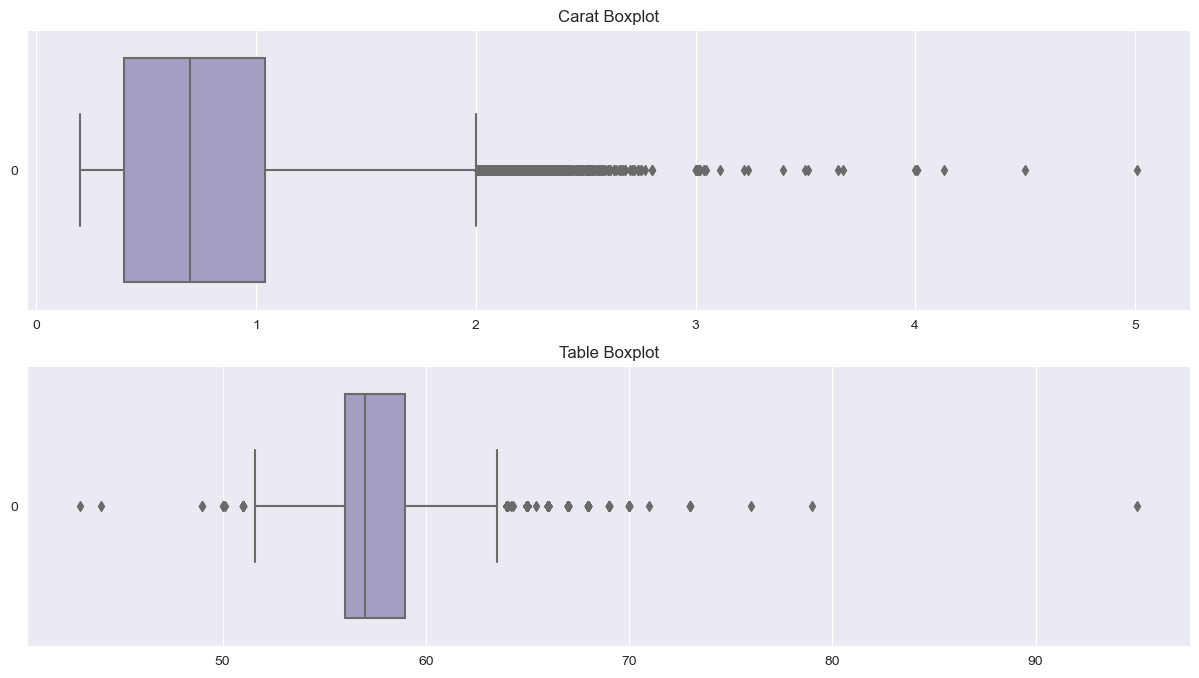

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,8), sharex=False, sharey=False)
sns.boxplot(df['carat'],palette='Purples' ,ax=axes[0], orient='h').set_title('Carat Boxplot')
sns.boxplot(df['table'],palette='Purples',ax=axes[1], orient='h').set_title('Table Boxplot')
plt.show()

There are numerous outliers in carat, but not as many in table.. Let's count them

 IQR. Its a method that used to count outliers

In [20]:
carat_q1, carat_q3 = df.carat.quantile(.25), df.carat.quantile(.75)
table_q1, table_q3 = df.table.quantile(.25) , df.table.quantile(.75)

carat_upper = carat_q3 + (carat_q3 - carat_q1)*1.5
carat_lower = carat_q1 - (carat_q3 - carat_q1)*1.5

table_upper = table_q3 + (table_q3 - table_q1)*1.5
table_lower = table_q1 - (table_q3 - table_q1)*1.5

In [21]:
outliers_carat = df[(df.carat>carat_upper) | (df.carat < carat_lower)].count()[0]
outliers_carat

1889

In [22]:
outliers_carat_percentage = (outliers_carat/ len(df)) * 100
outliers_carat_percentage

3.5020393029291808

In [23]:
outliers_table = df[(df.table > table_upper) | (df.table < table_lower)].count()[0]
outliers_table

605

In [24]:
outliers_table_percentage = (outliers_table/ len(df)) * 100
outliers_table_percentage

1.121616611049314

Outliers of carat are almost 3.5 % and outliers of table are almost 1% so lets consider them as special pieces

Now lets check the Price for outliers

Text(0.5, 1.0, ' Price Boxplot')

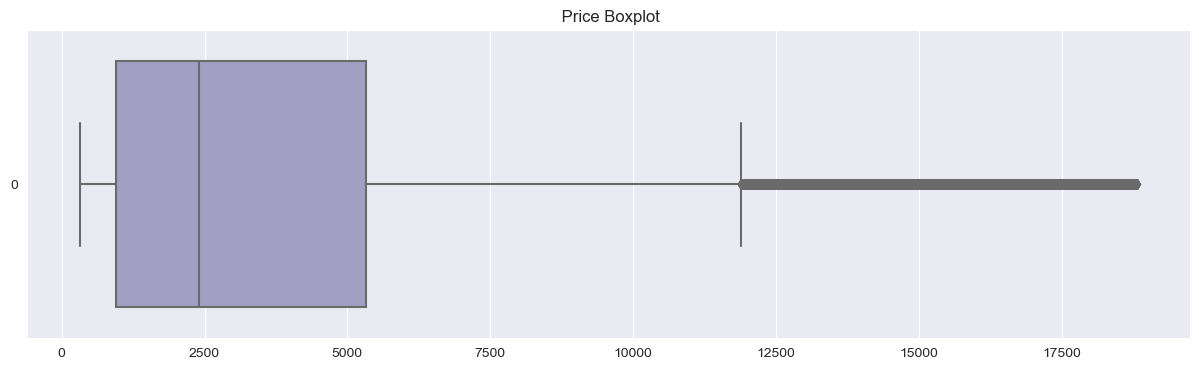

In [25]:
fig , axes = plt.subplots(nrows=1, ncols=1, figsize=(15,4))
sns.boxplot(df['price'],palette='Purples', orient='h').set_title(' Price Boxplot')

In [26]:
price_q1 , price_q3 = df.price.quantile(.25) , df.price.quantile(.75)

price_upper = price_q3 + 1.5 * (price_q3 - price_q1)

price_upper

11885.625

In [27]:
outliers_price = df[(df.price > price_upper)].count()[0]
outliers_price

3540

In [28]:
outliers_price_percentage = (outliers_price/ len(df)) * 100
outliers_price_percentage

6.562847608453838

We observe that 6.56 % of our prices are outliers

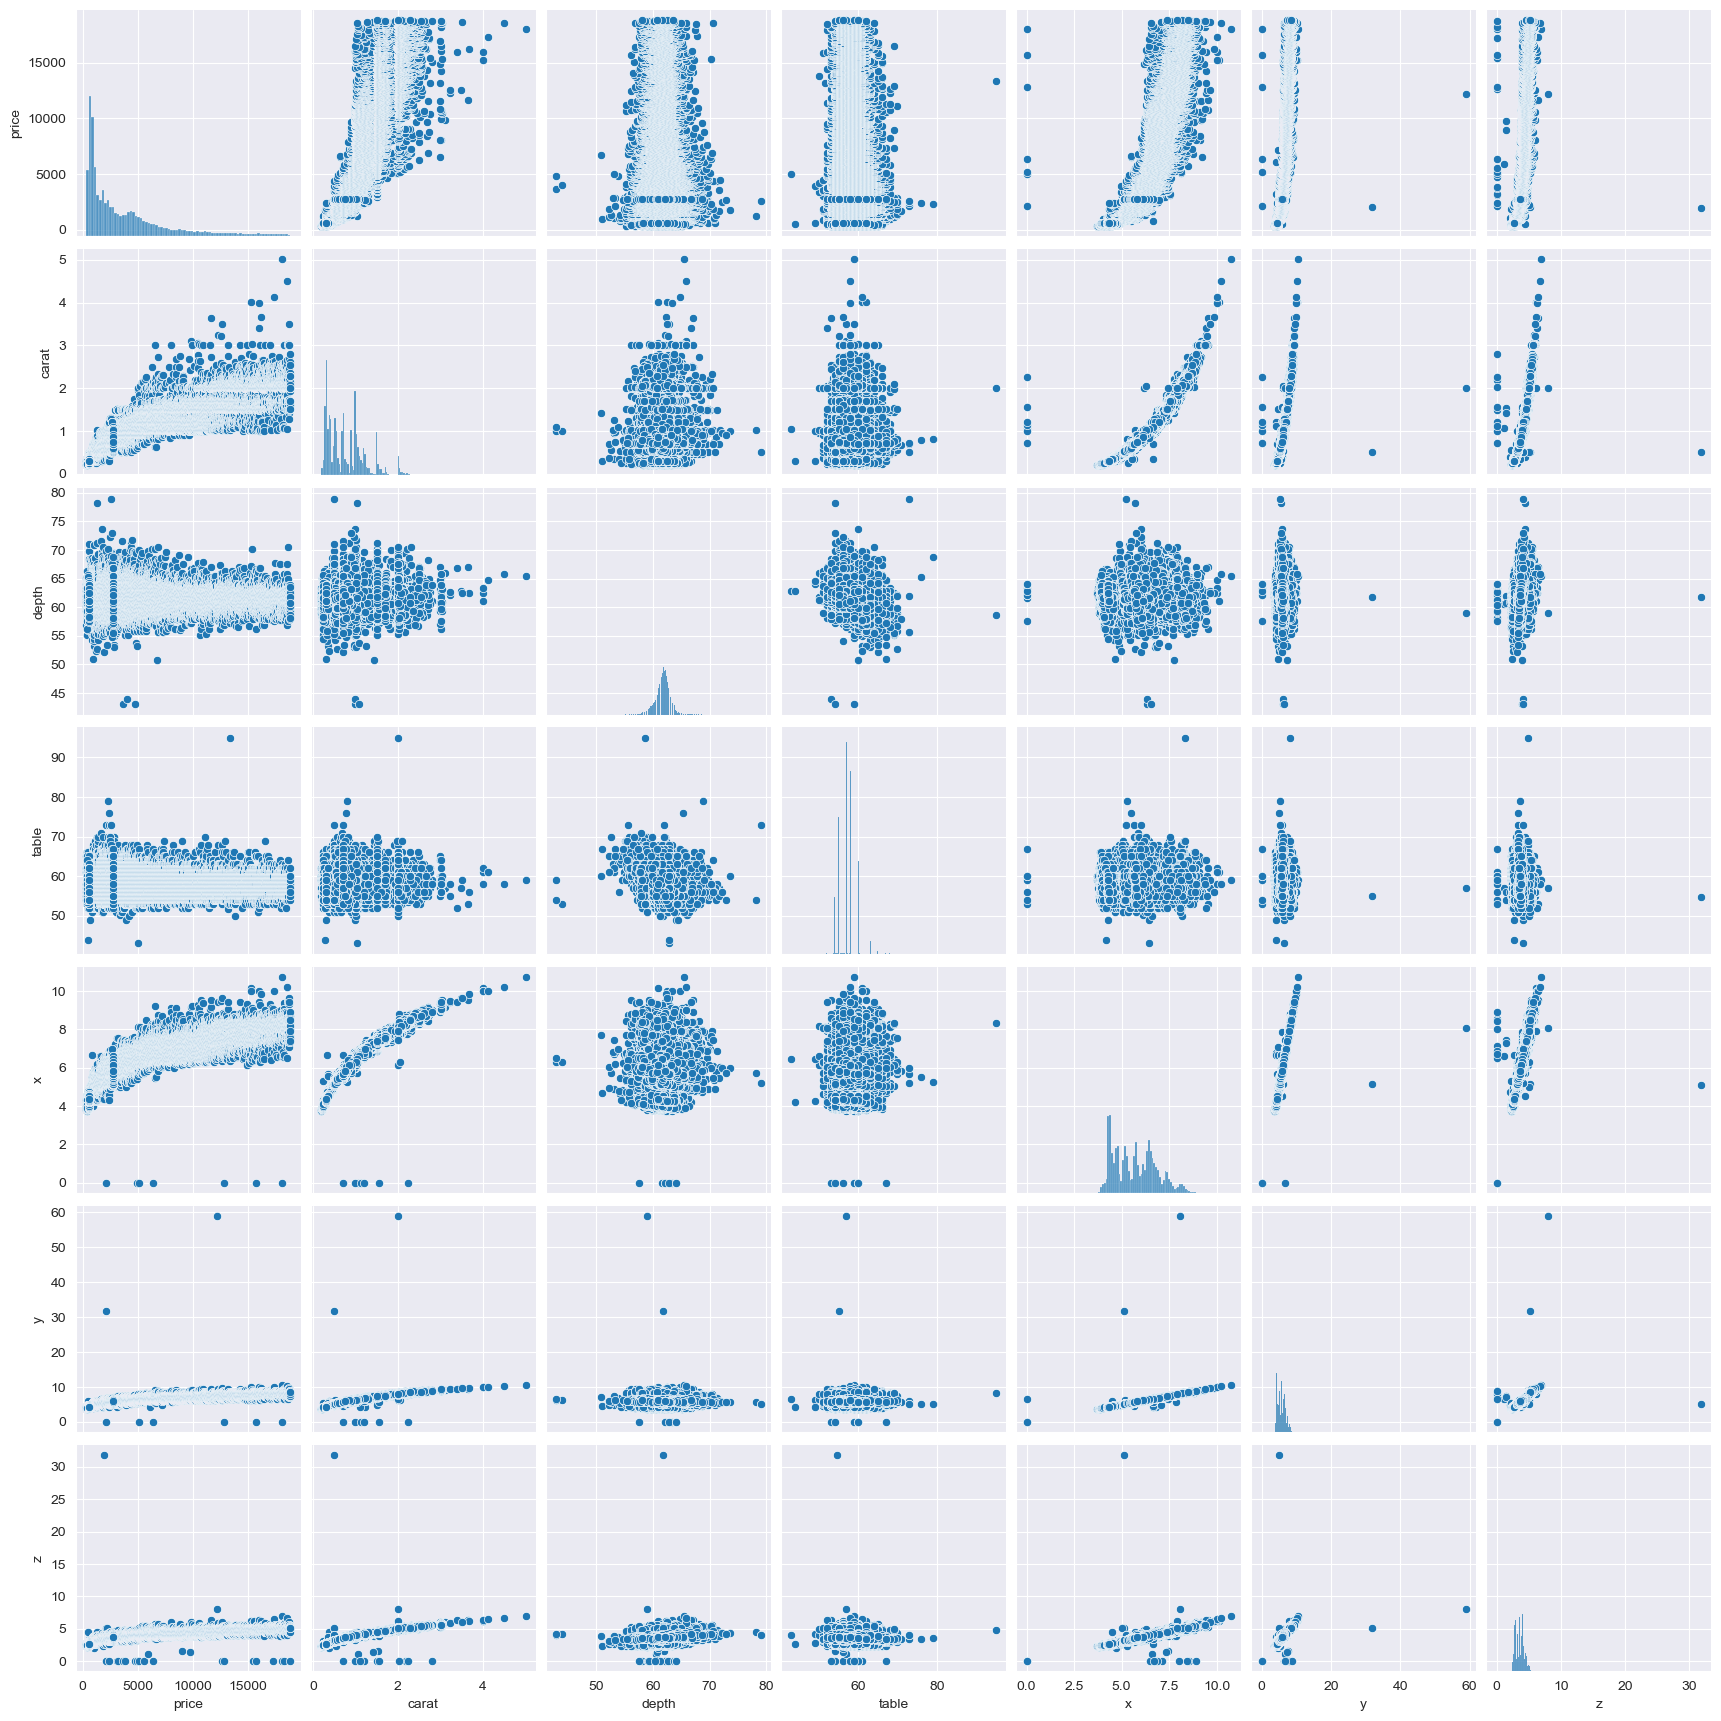

In [29]:
sns.pairplot(data=df[['price']+numerical_features])

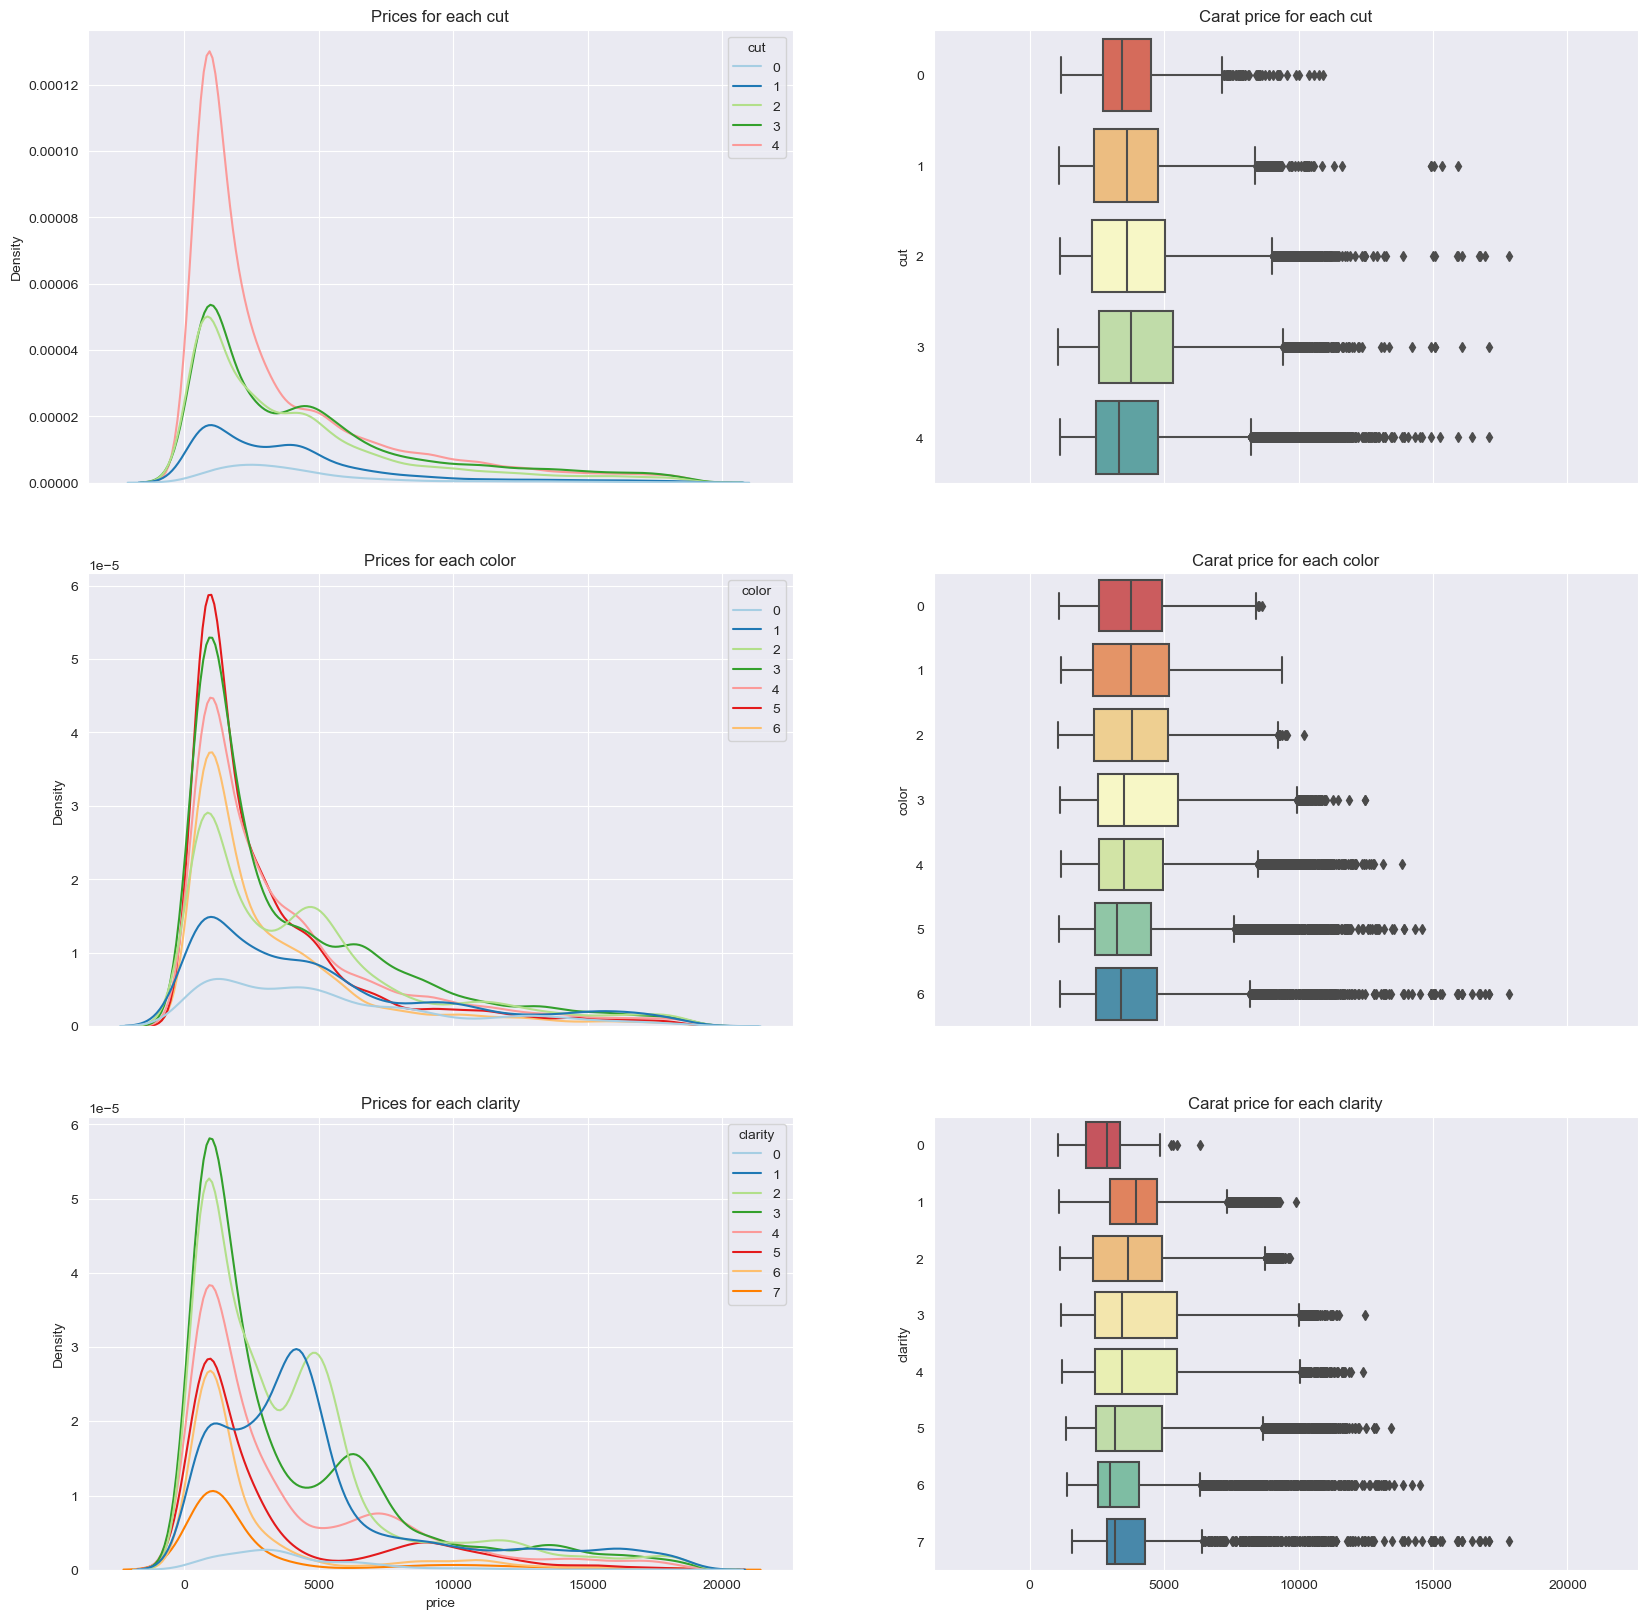

In [50]:
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=2, figsize=(20,20), sharex=True)
for i in range(len(categorical_features)):
    sns.kdeplot(data=df, x = 'price', hue=categorical_features[i], palette='Paired',
                ax=axes[i][0]).set_title(f'Prices for each {categorical_features[i]}')
    sns.boxplot(data=df, y=categorical_features[i], x=df['price']/df['carat'], palette='Spectral', 
                ax=axes[i][1]).set_title(f'Carat price for each {categorical_features[i]}')

We see that a better cut and higher color quality generally command a higher price.

However, the impact of clarity on price is somewhat unclear. 

Correlation

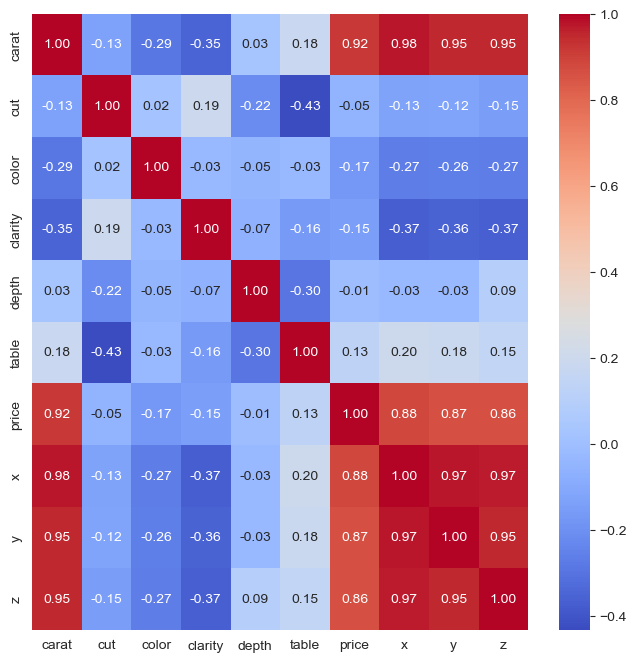

In [51]:
plt.figure(figsize=(8,8))
cor = df.corr()
sns.heatmap(cor, annot=True,fmt='.2f', cmap='coolwarm')
plt.show()

In [47]:
df.corr()['price'].sort_values()

color     -0.172511
clarity   -0.146800
cut       -0.053491
depth     -0.010647
table      0.127134
z          0.861249
y          0.865421
x          0.884435
carat      0.921591
price      1.000000
Name: price, dtype: float64

These correlations give us valuable insights into which features are most influential in determining the price of a diamond:



carat (0.921591):

Carat weight has the strongest positive correlation with price. This suggests that the weight of the diamond is the most significant factor in determining its price, with heavier diamonds being significantly more expensive.

x (0.884435):

The length (x) shows a strong positive correlation with the price, indicating that longer diamonds are typically more expensive.


y (0.865421):

Similar to z, the width (y) also has a strong positive correlation with the price. Wider diamonds generally have higher prices.

z (0.861249):

There is a strong positive correlation between the height (z) of the diamond and its price. This indicates that taller diamonds tend to be more expensive.


Business Insights:




Carat and Dimensions (x, y, z):

The weight of the diamond is the most significant factor in determining its price, which aligns with the diamond market, where larger diamonds tend to be significantly more expensive.

Categorical Features:

While the quality of color, clarity, and cut does influence the price, their impact is less significant than that of the diamond's weight and dimensions. This suggests that in practice, the market tends to prioritize the size of the diamond, with other quality characteristics playing a secondary role.

Pricing Strategy: 

Strategically, if a seller wants to maximize the price of diamonds, they should focus on selling larger diamonds (higher carat). However, they should also consider quality characteristics like color and clarity, which, though less critical, still contribute to the final price.

Creating the Model

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [53]:
X = df.drop(columns='price')
y = df['price']

In [54]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2)

Define Pipelines for Multiple Regression Models

In [55]:
pipe1 = Pipeline([('scaler', StandardScaler()),('Linear_Regression', LinearRegression())])
pipe2 = Pipeline([('scaler', StandardScaler()),('Lasso_Regression', Lasso())])
pipe3 = Pipeline([('scaler', StandardScaler()),('Ridge_Regression', Ridge())])
pipe4 = Pipeline([('scaler', StandardScaler()),('SGD_Regressor', SGDRegressor())])
pipe5 = Pipeline([('scaler', StandardScaler()),('RandomForest_Regressor', RandomForestRegressor())])
pipe6 = Pipeline([('scaler', StandardScaler()),('DecisionTreeRegressor', DecisionTreeRegressor())])
pipe7 = Pipeline([('scaler', StandardScaler()),('KNN_Regressor', KNeighborsRegressor())])
pipe8 = Pipeline([('scaler', StandardScaler()),('XGB_Regressor', XGBRegressor())])

Train Models and Record Prediction Time

In [61]:
Pipelines = [pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7,pipe8]
ypreds = []
for pipe in Pipelines:
    start_time = np.datetime64('now')
    pipe.fit(Xtrain,ytrain)
    ypreds.append(pipe.predict(Xtest))
    period = pd.Timedelta(np.datetime64('now')-start_time).total_seconds()
    modelname = str(pipe[-1]).split('(')[0]
    print(f'fitting model {modelname} took {period} seconds','\n', '-'*50)

fitting model LinearRegression took 0.0 seconds 
 --------------------------------------------------
fitting model Lasso took 0.0 seconds 
 --------------------------------------------------
fitting model Ridge took 0.0 seconds 
 --------------------------------------------------
fitting model SGDRegressor took 0.0 seconds 
 --------------------------------------------------
fitting model RandomForestRegressor took 29.0 seconds 
 --------------------------------------------------
fitting model DecisionTreeRegressor took 1.0 seconds 
 --------------------------------------------------
fitting model KNeighborsRegressor took 0.0 seconds 
 --------------------------------------------------
fitting model XGBRegressor took 0.0 seconds 
 --------------------------------------------------


Evaluate Model Performance Using Multiple Metrics


 ============================== by using metric of mean_absolute_error ============================== 

    LinearRegression 	 : 811.1127306445698
               Lasso 	 : 812.2498659199158
               Ridge 	 : 811.202890686542
        SGDRegressor 	 : 819.3710447120433
RandomForestRegressor 	 : 268.08777573386016
DecisionTreeRegressor 	 : 361.26344086021504
 KNeighborsRegressor 	 : 377.5768631813126
        XGBRegressor 	 : 276.7391243108255


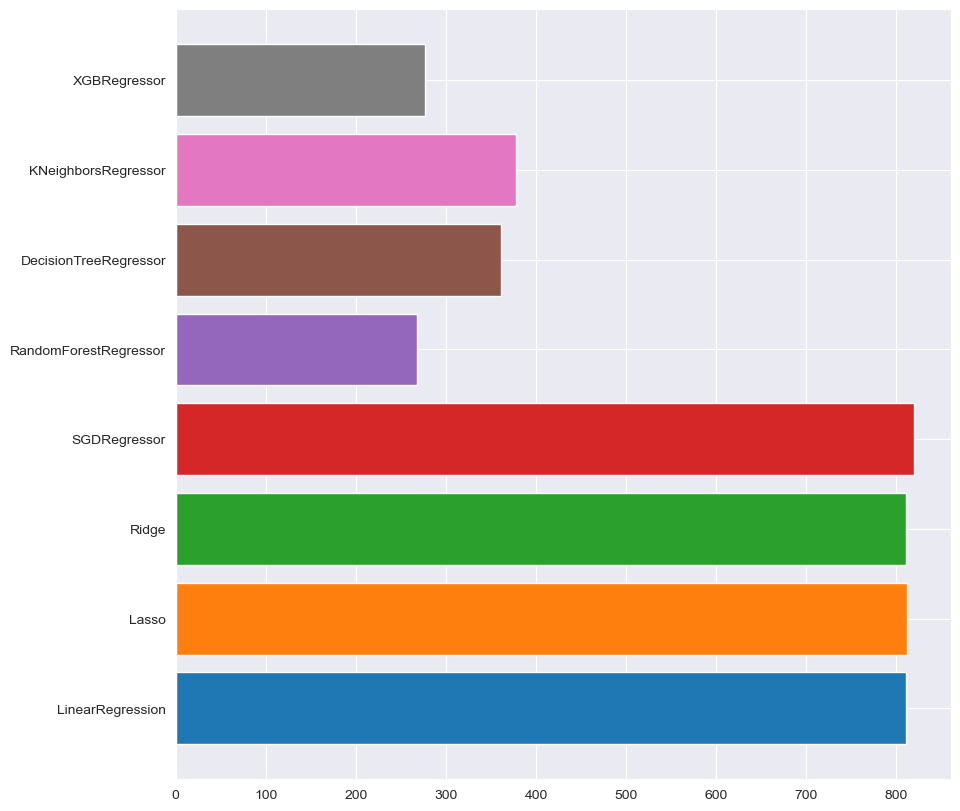


 ============================== by using metric of mean_squared_error =============================== 

    LinearRegression 	 : 1532219.4814688014
               Lasso 	 : 1532439.6154007688
               Ridge 	 : 1532204.002587096
        SGDRegressor 	 : 1534777.8854720134
RandomForestRegressor 	 : 280892.4242769354
DecisionTreeRegressor 	 : 562380.3086299592
 KNeighborsRegressor 	 : 525772.352814238
        XGBRegressor 	 : 297868.8819377456


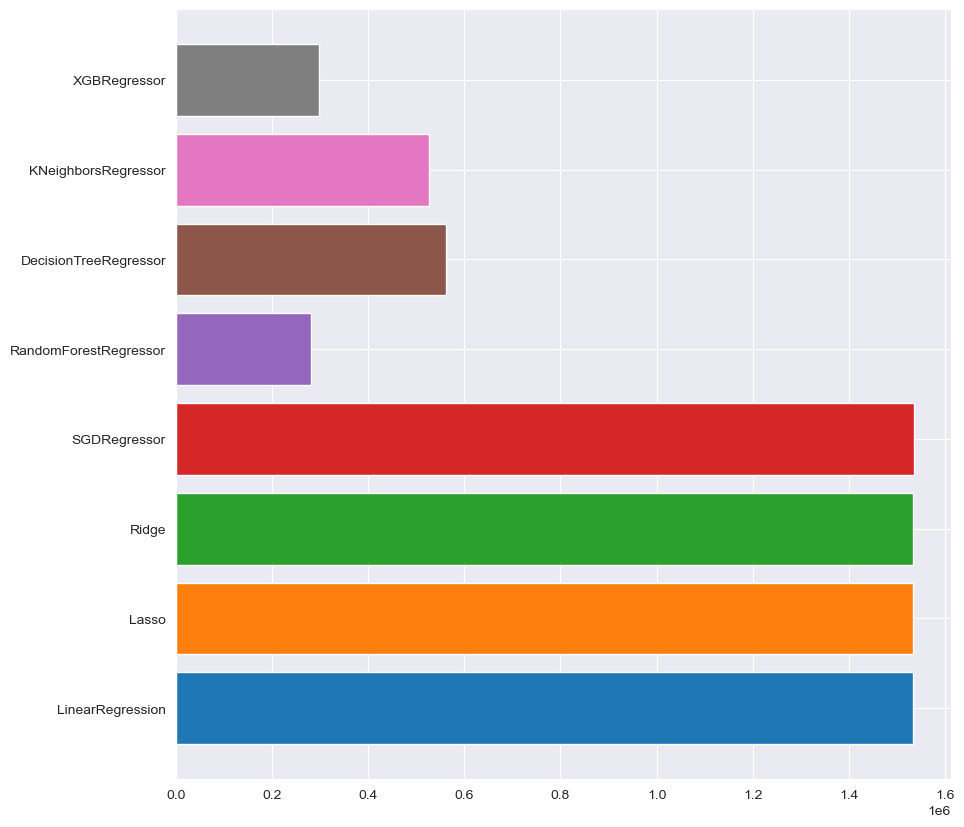


 =================================== by using metric of r2_score ==================================== 

    LinearRegression 	 : 0.8945791781467018
               Lasso 	 : 0.8944564056533606
               Ridge 	 : 0.8945709850567535
        SGDRegressor 	 : 0.8949054087226053
RandomForestRegressor 	 : 0.9821744895604
DecisionTreeRegressor 	 : 0.9647012398093253
 KNeighborsRegressor 	 : 0.9656485225542146
        XGBRegressor 	 : 0.98116772703102


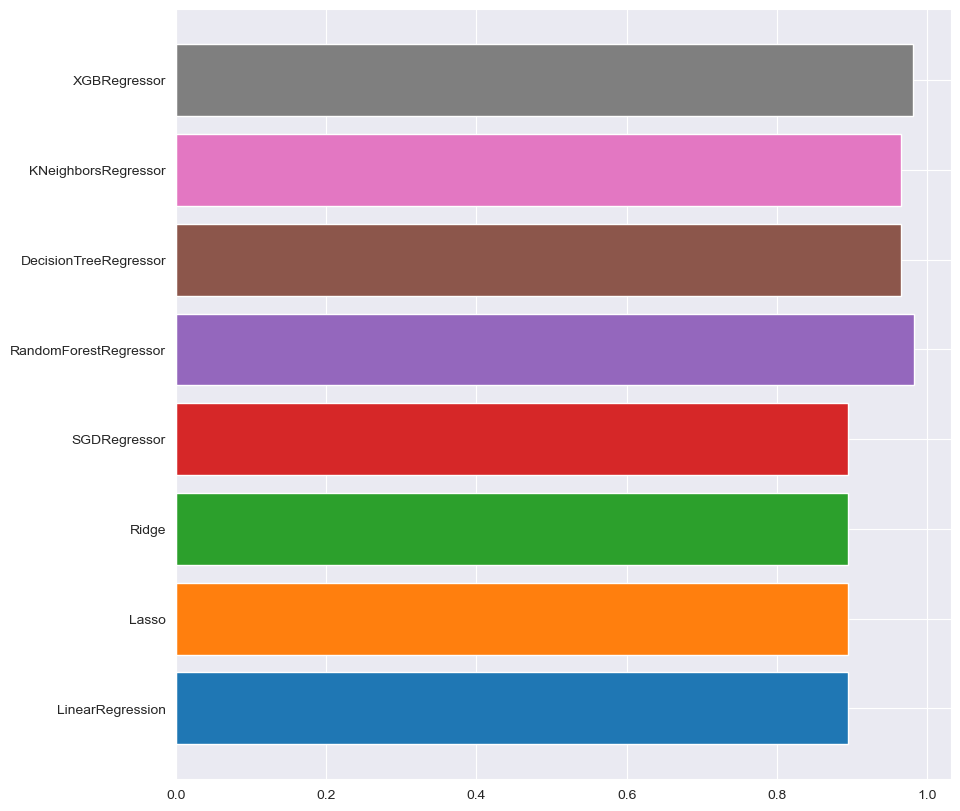

In [65]:
results = dict
for i in [mean_absolute_error, mean_squared_error, r2_score]:
    plt.subplots(figsize=(10,10))
    metric_name = str(i).split()[1]
    print('\n',f' by using metric of {metric_name} '.center(100,'='),'\n')
    for j in range(len(Pipelines)):
        score=i(ypreds[j],ytest)
        modelname = str(Pipelines[j][-1]).split('(')[0]
        print(modelname.rjust(20),'\t :', score)
        plt.barh(modelname,score)
    plt.show()

After running several machine learning models to predict diamond prices, we observe distinct performance differences across the models, measured by three metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²).

1) Performance of Linear Models (Linear Regression, Lasso, Ridge, SGD):
    
The linear models, including Linear Regression, Lasso, Ridge, and SGD, all show similar performance, with relatively high errors (MAE around 811-819) and lower accuracy (R² around 0.89). This suggests that these models struggle to capture the complexity of the data, likely because of the linearity assumption.

2) Performance of Tree-Based Models (Random Forest, Decision Tree, XGBoost):
    
Tree-based models, especially Random Forest and XGBoost, outperform the linear models significantly. Random Forest and XGBoost have much lower errors (MAE of 268 and 276, respectively) and much higher accuracy (R² above 0.98), indicating that these models are better at capturing the non-linear relationships in the data.


Decision Tree, while not as strong as Random Forest or XGBoost, still performs better than the linear models with an MAE of 361 and R² of 0.96.

3) K-Nearest Neighbors (KNN):

The KNN model performs similarly to the Decision Tree, with moderate errors (MAE of 377) and a reasonably high R² of 0.96, suggesting it’s a viable alternative to the tree-based models, though slightly less accurate.

Recommendation:

For predicting diamond prices, tree-based models like Random Forest and XGBoost provide the most accurate predictions and should be preferred in this context. These models handle the complexity and non-linearity of the data better than linear models.